# Midterm Assignment, topic 3: Static entry game

> The sequence of tasks below should be performed in order in this
notebook. Feel free to add code and markdown cells, but do not change
cells that contain the assignment tasks.
If the task offers some degree of interpretation (so, don’t tell you what
to do exactly), you are free to interpret it in the way you see fit
best. But remember to explain why you make such and such choice in your answer.

> The grade for the midterm assignment is based on both the code
correctness and code style. The former relates to whether the code
adequately represents the economic model under consideration, and the
latter has to do with how well the code is modularized and organized,
whether appropriate syntax is used, and whether the code is well
documented. [PEP 8](https://www.python.org/dev/peps/pep-0008/)
standard is a good reference for coding style, but will not reduce the
grade.

## Static entry game

In this assignment you consider a static game of firms’ entry to the
market, and investigate its equilibria. Consider the model with one
market which is set up in Section 2.1 of * Che-Lin Su “Estimating
discrete-choice games of incomplete information: Simple static
examples”, Quant Mark Econ (2014) 12:167–207

### Task 1. Design and implement a Python class to represent the model

- The class should implement the best response functions for the two
  firms under the assumption of Extreme Value Type I distributed
  private types, but also the profit functions and the choice rule that
  would be function of both observed and unobserved types.  
- Design the attributes of the class to hold the structural parameters
  of the model ($ \alpha $ and $ \beta $) and implement *init*
  and *repr* methods. Implement other methods according to your design.  
- Make a *plot* method for the class to illustrate the best response
  functions on the unit square.  


Use the starter code below.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class EntryModel(object):

    def __init__(self, α, β, label=''):
        '''Initialize the Model instance'''
        self.label = label
        self.α = α
        self.β = β


    def __repr__(self):
        '''Representation of a Model's instance '''
        return 'Model labeled `%s` with parameters alpha=%.3f sigma=%.3f' % (self.label, self.alpha, self.beta)


    def utility_a(self, ya, yb, xa, ε0, ε1):
        '''Random utility function for firm a '''
        res1 = (self.α + yb * (self.β - self.α)) * xa + ε1
        res0 = ε0
        return res1 if ya == 1 else res0


    def utility_b(self, ya, yb, xb, ε0, ε1):
        '''Random utility function for firm b '''
        res1 = (self.α + ya * (self.β -self.α)) * xb + ε1
        res0 = ε0
        return res1 if yb == 1 else res0


    def BRp(self, q, x):
        '''best responce (BR) function for the firms'''
        q, x = np.array(q), np.array(x)
        assert np.logical_and(0 <= q, q<= 1).all(), 'invalid probabilities'
        res = 1 / (1+np.exp(-self.α * x + q*x*(self.α - self.β)))
        return res


    def BR_inverse(self, p, x):
        '''inverse best responce function for the firms'''
        p, x = np.array(p), np.array(x)
        assert np.logical_and(0 <= p, p <= 1).all(), 'invalid probabilities'
        res = (np.log(1 / p - 1) + self.α * x) / (x * (self.α - self.β))
        return res


    def plot(self, ax, xa, xb):
        '''Functions to plot the BR functions on one graph'''
        BR_xgrid = np.r_[0.00001:0.99999:300j]
        BRb_ygrid = self.BRp(BR_xgrid, xb)
        BRinva_ygrid = self.BR_inverse(BR_xgrid, xa)
        ax.plot(BR_xgrid, BRb_ygrid, label = 'BR of Firm b', color = 'b', alpha = 0.7)
        ax.plot(BR_xgrid, BRinva_ygrid, label = 'BR of Firm a', color = 'm', alpha = 0.7)
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.legend(loc = 'best')
        ax.grid(ls = '--', alpha = 0.4)
        ax.set_xlabel('$p_a$')
        ax.set_ylabel('$p_b$')
        ax.set_title('Best Response')


    def BR_solver(self, xa, xb, p_lower=1e-3, p_upper=1-1e-3, tol=1e-10):
        '''Function to solve single Bayes–Nash (BN) equilibrium between p_lower and p_upper'''
        D = lambda p: self.BRp(p,xb) - self.BR_inverse(p,xa)
        if D(p_lower)*D(p_upper) > 0: return None
        a, b = p_lower, p_upper
        while np.abs(a-b) >= tol:
            m = (a+b)/2
            if D(a) * D(m) < 0: a, b = a, m
            elif D(b) * D(m) <= 0: a, b = m, b
        else: root = (a + b)  / 2
        return (root, self.BR_inverse(root, xa))


    def BR_multiple_solver(self, xa, xb, tol=1e-10, N0=300, callback=None):
        '''Function to find all the BN equilibria'''
        
        # Initial value
        p = p_0
        
        for iter in range(N0):
            p_1 = BRp(p, x) # this needs to be corrected
            error = np.abs(p_1 - p)
            if callback:
                callback(iter, p, p_1, error)
            if error < tol:
                return p_1
            p = p_1
        else:
            raise(RuntimeError('Failed to converge'))
            
    def callback_function(iter, p, p_1, err):
        if iter == 0:
            print('%4s %16s %16s %6s'%('iter', 'p', 'p1', 'err'))
            print('-'*50)
        print('%4d %16.12f %16.12f %6.2e'%(iter, p, p1, np.abs(p - p_1)))

### Task 2. Illustrate the possible configurations of the market

Find the appropriate values of the parameters and
illustrate the possible configurations of the best response functions on
the unit square to show that both single and multiple equilibria are
possible with particular values of $ x_a $, $ x_b $
$ \alpha $ and $ \beta $

- In particular, replicate the three equilibrium case from section 2.1 of the paper  
- Give economic interpretation to the model parameters  

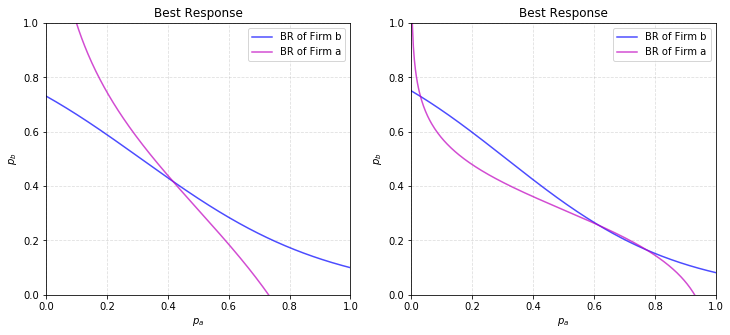

In [5]:
M = EntryModel(5,-11)
xa1,xb1 = 0.2, 0.2
xa2,xb2 = 0.52, 0.22
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
# plot two graphs with different xa and xb
M.plot(ax1, xa1, xb1)
M.plot(ax2, xa2, xb2)
plt.show()

### Task 3. Create a solver for the equilibria of the model using best response functions

The equilibrium of the model is given by the intersection points of
the best response functions which can be found by solving the
corresponding non-linear equation.

- Implement this approach using the constrained Newton algorithm from week 6 assignment  
- Analise the performance of the algorithm in the multiple equilibria case  

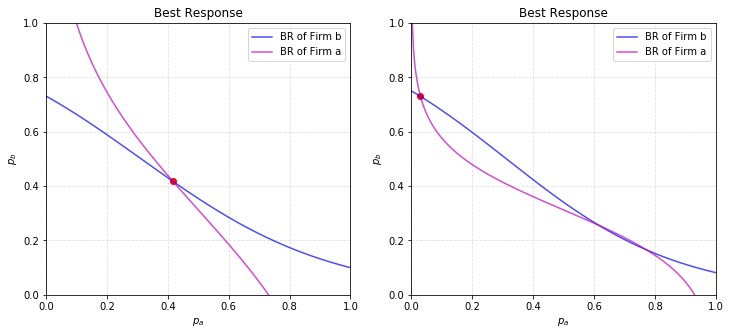

In [3]:
# In this solution the solver is part of class
M = EntryModel(5,-11)
xa1,xb1 = 0.2, 0.2
xa2,xb2 = 0.52, 0.22
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
# plot two graphs with different xa and xb
M.plot(ax1, xa1, xb1)
M.plot(ax2, xa2, xb2)
eqb1 = np.array(M.BR_solver(xa1, xb1))
ax1.scatter(eqb1[0],eqb1[1],c='r')
eqb2 = np.array(M.BR_solver(xa2, xb2))
ax2.scatter(eqb2[0],eqb2[1],c='r')
plt.show()

### Task 4. Second order best response function approach

Because of the possibility for multiple equilibria, more involved
solution methods may be needed. Consider the second order best
response function which is given by

$$
B(p) = p_a\big(p_b(p)\big),
$$

where $ p_a(p) $ is the best response of firm $ a $ to the entry
probability $ p $ of firm $ b $, and $ p_b(p) $ is the best
response of firm $ b $ to the entry probability $ p $ of firm
$ a $.

The equilibrium is then given by fixed point of $ B(p)=p $ which
could potentially be found by successive approximation, i.e. sequence of
approximations $ p_{i+1} = B(p_i) $.  This requires a very simple
algorithm that initiates at some $ p_{0} $ and repeatedly applies
the function $ B() $ to the current estimate of the price.

- Make a function to plot of second order best response function  
- Make the second order best response plots for all specification in Task 2  
- Implement the successive approximations solution algorithm with the callback
  function similar to how it was done in week 6 assignment  
- Test the performance of the successive approximations algorithm, starting
  it at different initial values $ p_{0} $, print out the sequence
  $ p_{0},p_{1},p_{2},\dots $ and the differences between two successive
  values, similarly to how it was done in week 6 assignment  
- Compare the convergence performance to the Newton-based algorithm in Task 3  


What are the types of equilibria that can be computed with successive approximation
algorithm?

### Task 5. Robust algorithm to find all equilibria

A good approach to finding all equilibria in a robust way is a two stage algorithm,
where the Newton method from Task 3 is called with an approximate solution as a starting point.
To implement this approach, we need to use a piecewise linear approximation of best response
functions.  It easy to find all intersection points of the approximate best responses, which
would serve a excellent starting points for the Newton solver.

To implement this two stage procedure, first update the polyline class from weekly assignment 5
for the needs of this model.  The class should implement the piece-wise
linear line in a $ p_1 $-$ p_2 $ plane and compute the intersections between two such
lines.  The  difference from the polyline class here is that the points have to maintain
the natural order rather than being sorted.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class best_response_line():
    '''Class that implements the piecewise linear best responce functions'''

    def __repr__(self):
        '''Print for best response functions'''
        return self.__str__(self)

    def __str__(self):
        '''String representation for best response functions'''
        return 'Best response "%s" with q1=%s, q2=%s' % (self.label,self.q1,self.q2)

    def __init__(self,q1=[],q2=[],label=''):
        '''Constructor for best response function class'''
        # one dimensional np arrays
        q1 = np.array(q1).flatten()
        q2 = np.array(q2).flatten()
        # save arguments as object properties
        self.q1, self.q2 = q1, q2
        self.label = label

    def __len__(self):
        '''Returns the length of polyline'''
        return self.q1.size

    def plot(self, **kvargs):
        '''Plot of the line'''
        plt.plot(self.q1,self.q2,label=self.label,**kvargs)
        return

    def intersect(self,other):
        '''Finds all intersection points of two best_response_lines'''
        intersections=[]
        if isinstance(other,best_response_line):
            for i in range(len(self)-1):
                for j in range(len(other)-1):
                    # check if segments i and j intersect
                    intr = self.__intersect_segments(self.q1[i],self.q2[i],
                                                     self.q1[i+1],self.q2[i+1],
                                                     other.q1[j],other.q2[j],
                                                     other.q1[j+1],other.q2[j+1])
                    if intr:
                        intersections.append(list(intr))
            return np.array(intersections)
        else:
            raise TypeError('Only polyline can be intersected')

    def __intersect_segments(self,*arg):
        '''Find intersection of two line segments given by 4 (x,y) points'''
        # unpack parameters
        x11,y11,x12,y12=arg[:4] #first line segment
        x21,y21,x22,y22=arg[4:] #second line segment
        # bounding box check: whether intersection is possible in principle
        bb = ( min(x11,x12)<max(x21,x22) and min(x21,x22)<max(x11,x12) and
               min(y11,y12)<max(y21,y22) and min(y21,y22)<max(y11,y12) )
        if not bb:
            return None
        # form system of equations
        A = np.array([[x12-x11,0,-1,0],[0,x22-x21,-1,0],[y12-y11,0,0,-1],[0,y22-y21,0,-1]])
        b = np.array([-x11,-x21,-y11,-y21])
        t1,t2,x0,y0 = np.linalg.solve(A,b)
        if 0 <= t1 <= 1 and 0 <= t2 <= 1:
            return x0,y0
        else:
            return None

Test your work using the code below, which should find and mark one intersection

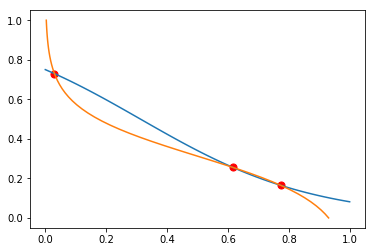

In [5]:
pm = np.linspace(0,1,50)
M = EntryModel(5,-11)
xa,xb = 0.52, 0.22
line1 = best_response_line(pm, M.BRp(pm, xb))
line2 = best_response_line(M.BRp(pm, xa), pm)
eqb = line1.intersect(line2)
line1.plot()
line2.plot()
plt.scatter(eqb[:,0],eqb[:,1],c='red',s=50)
plt.show()

Once, the best_response_line class is ready, implement the two stage solution algorithm
and demonstrate its performance by computing all equilibria in 3 different examples (with parameters of your choice).
Make sure that all three example have multiple equilibria each.
Draw the best response lines and market the found equilibria for each example.

What is the maximum number of equilibria you can find?